In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv("D:\\2309683664\\Amazon_baby.csv")
df

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


### 1.  Number of the reviews received for each product

In [2]:
df['name'].value_counts()

Vulli Sophie the Giraffe Teether                                                                                                                                                                                                                                                                                                                       785
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L                                                                                                                                                                                                                                                                                                    562
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision                                                                                                                                                                                                                                          

### 2. Products with more than 15 reviews

In [3]:
df['name'].value_counts() > 15

Vulli Sophie the Giraffe Teether                                                                                                                                                                                                                                                                                                                        True
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L                                                                                                                                                                                                                                                                                                     True
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision                                                                                                                                                                                                                                      

### 3. Find any missing review are present or not, If present remove those data.

In [4]:
df['review'].isnull().sum()

829

In [5]:
df.dropna(subset = ['review'], inplace = True)

In [6]:
df['review'].isnull().sum()

0

### 4. Clean the data and remove the special characters and replace the contractions with its expansion by converting the uppercase character to lower case. Also, remove the punctuations. 

In [7]:
pip install contractions

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
import re
import string
import contractions

def clean_text(text):
    if pd.isna(text):
        return text
    
    text = contractions.fix(text)
    
    text = text.lower()
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    return text

print("Original DataFrame:")
print(df)

df['review'] = df['review'].apply(clean_text)

print("\nCleaned DataFrame:")
print(df)


Original DataFrame:
                                                     name  \
0                                Planetwise Flannel Wipes   
1                                   Planetwise Wipe Pouch   
2                     Annas Dream Full Quilt with 2 Shams   
3       Stop Pacifier Sucking without tears with Thumb...   
4       Stop Pacifier Sucking without tears with Thumb...   
...                                                   ...   
183526  Baby Teething Necklace for Mom Pretty Donut Sh...   
183527  Baby Teething Necklace for Mom Pretty Donut Sh...   
183528   Abstract 2 PK Baby / Toddler Training Cup (Pink)   
183529  Baby Food Freezer Tray - Bacteria Resistant, B...   
183530  Best 2 Pack Baby Car Shade for Kids - Window S...   

                                                   review  rating  
0       These flannel wipes are OK, but in my opinion ...       3  
1       it came early and was not disappointed. i love...       5  
2       Very soft and comfortable and warme

### 5. Add the Polarity, length of the review, the word count and average word length of each review

In [9]:
pip install pandas textblob nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_length(text):
    return len(text)

def get_word_count(text):
    return len(text.split())

def get_average_word_length(text):
    words = text.split()
    if len(words) == 0:
        return 0
    return sum(len(word) for word in words) / len(words)

def clean_text(text):
    if pd.isna(text):
        return text
    
    text = contractions.fix(text)
    
    text = text.lower()
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    return text

df['review'] = df['review'].apply(clean_text)

df['polarity'] = df['review'].apply(get_polarity)
df['length'] = df['review'].apply(get_length)
df['word_count'] = df['review'].apply(get_word_count)
df['average_word_length'] = df['review'].apply(get_average_word_length)

print(df)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                     name  \
0                                Planetwise Flannel Wipes   
1                                   Planetwise Wipe Pouch   
2                     Annas Dream Full Quilt with 2 Shams   
3       Stop Pacifier Sucking without tears with Thumb...   
4       Stop Pacifier Sucking without tears with Thumb...   
...                                                   ...   
183526  Baby Teething Necklace for Mom Pretty Donut Sh...   
183527  Baby Teething Necklace for Mom Pretty Donut Sh...   
183528   Abstract 2 PK Baby / Toddler Training Cup (Pink)   
183529  Baby Food Freezer Tray - Bacteria Resistant, B...   
183530  Best 2 Pack Baby Car Shade for Kids - Window S...   

                                                   review  rating  polarity  \
0       these flannel wipes are ok but in my opinion n...       3  0.083333   
1       it came early and was not disappointed i love ...       5  0.367000   
2       very soft and comforta

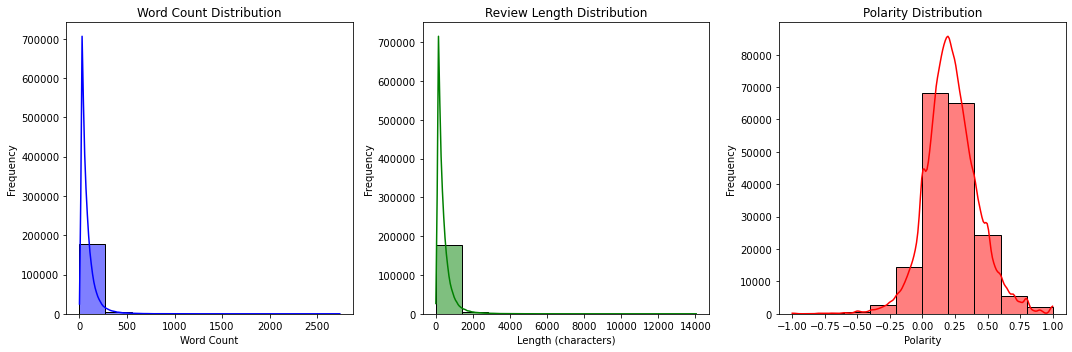

In [11]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['word_count'], kde=True, bins=10, color='blue')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df['length'], kde=True, bins=10, color='green')
plt.title('Review Length Distribution')
plt.xlabel('Length (characters)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df['polarity'], kde=True, bins=10, color='red')
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 7. Visualize polarity considering the rating

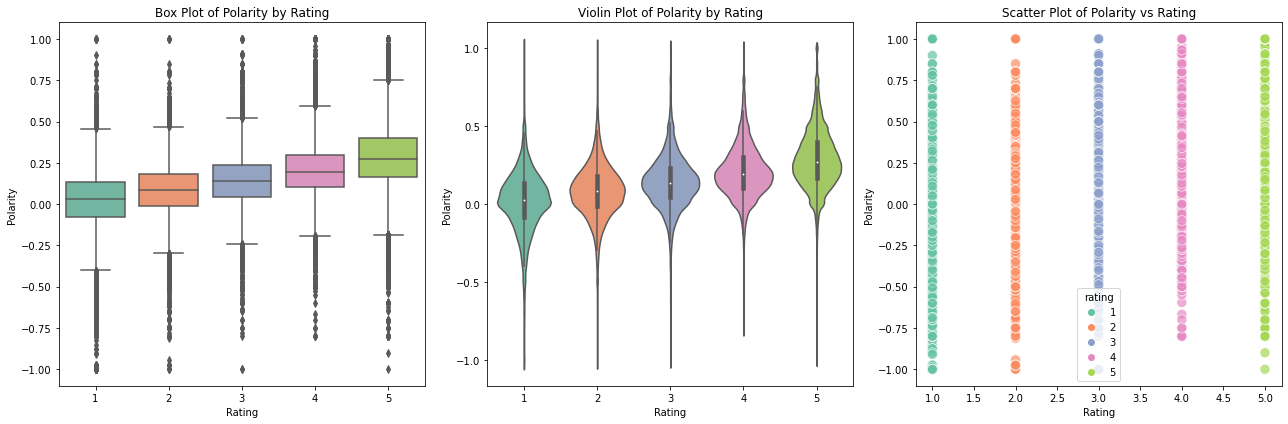

In [12]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='rating', y='polarity', data=df, palette='Set2')
plt.title('Box Plot of Polarity by Rating')
plt.xlabel('Rating')
plt.ylabel('Polarity')

plt.subplot(1, 3, 2)
sns.violinplot(x='rating', y='polarity', data=df, palette='Set2')
plt.title('Violin Plot of Polarity by Rating')
plt.xlabel('Rating')
plt.ylabel('Polarity')

plt.subplot(1, 3, 3)
sns.scatterplot(x='rating', y='polarity', data=df, hue='rating', palette='Set2', s=100, alpha=0.7)
plt.title('Scatter Plot of Polarity vs Rating')
plt.xlabel('Rating')
plt.ylabel('Polarity')

plt.tight_layout()
plt.show()

### 8. Visualize the count of the reviews of each rating available in the dataset

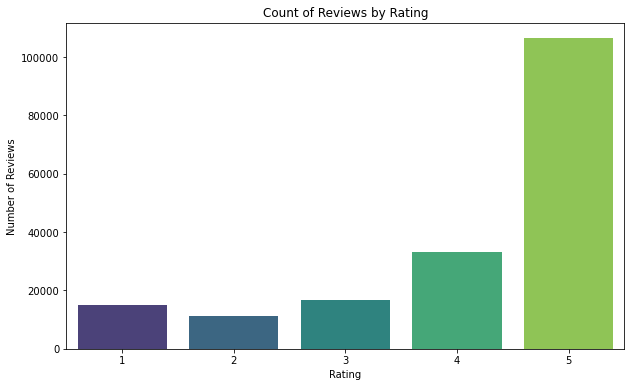

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Count of Reviews by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

### 9. List the Top 20 products based on the polarity

In [14]:
product_polarity = df.groupby('name')['polarity'].mean().reset_index()
top_products = product_polarity.sort_values(by='polarity', ascending=False).head(20)
print(top_products)

                                                    name  polarity
2416   Baby Jack Blankets Boxy Blue Orange Satin Tab ...       1.0
23191                           Pit Stop- Full Sheet set       1.0
12229     Gerber 10-pack Flatfold Birdseye Cloth Diapers       1.0
12199  Generic Classic Metal Wall Mount Jewelry Organ...       1.0
1626                   BIG KID (mens large - sport grey)       1.0
22616                    Peg-Perego Skate Bassinet Stand       1.0
11679     Fisher-Price Space Saver High Chair, Brown/Tan       1.0
11085                         Farm Yard Crib Bedding Set       1.0
22960                    Philips AVENT Thermal Tote Navy       1.0
10806  Evenflo JourneyLite Travel System with Embrace...       1.0
23631                         Potty Time Full Collection       1.0
21722         OXO Tot Feeding Spoon Set, Aqua - Set of 4       1.0
24416                  Roca Boy 4 Piece Crib Bedding Set       1.0
25536  Scandinavian Child Anka Convertible High Chair...      

### 10. Visualize to check whether the review length changes with rating

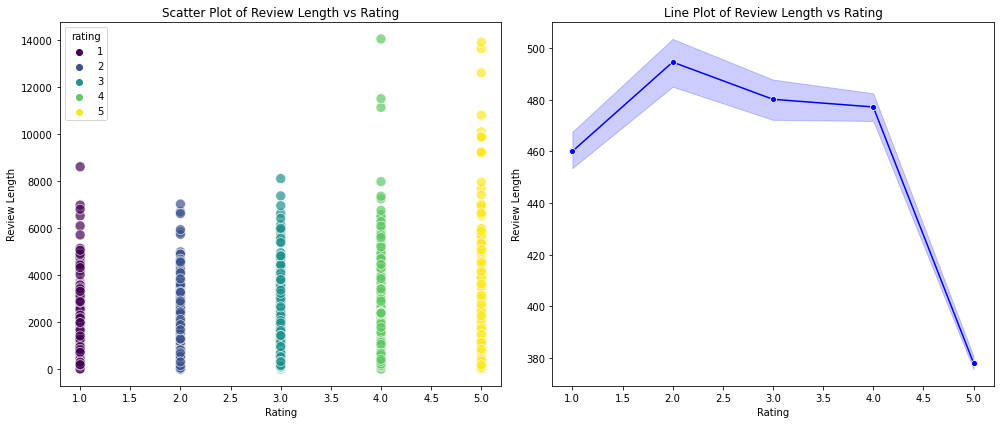

In [15]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='rating', y='length', data=df, hue='rating', palette='viridis', s=100, alpha=0.7)
plt.title('Scatter Plot of Review Length vs Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.subplot(1, 2, 2)
sns.lineplot(x='rating', y='length', data=df, marker='o', color='blue')
plt.title('Line Plot of Review Length vs Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.tight_layout()
plt.show()

### 11. Visualize the distribution of Top 25 Unigram, Bigram and Trigram

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mca\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mca\AppData\Roaming\nltk_data...


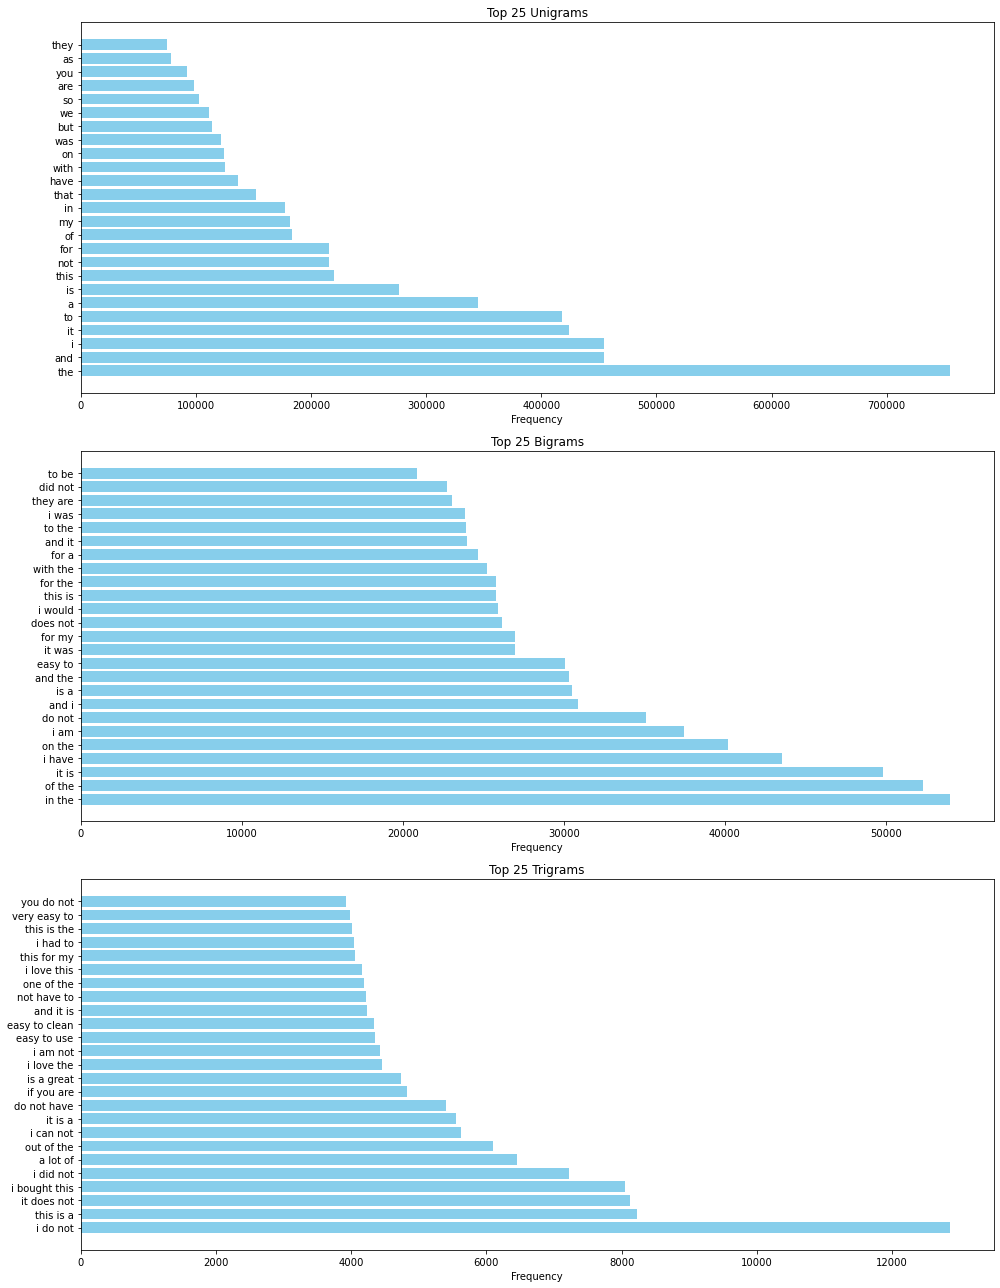

In [16]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

def preprocess_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    return tokens

all_tokens = []
for text in df['review']:
    all_tokens.extend(preprocess_and_tokenize(text))
    
unigrams = Counter(all_tokens)
bigrams = Counter(ngrams(all_tokens, 2))
trigrams = Counter(ngrams(all_tokens, 3))

top_25_unigrams = unigrams.most_common(25)
top_25_bigrams = bigrams.most_common(25)
top_25_trigrams = trigrams.most_common(25)

def plot_top_n(counts, title, ax):
    items, frequencies = zip(*counts)
    items = [' '.join(item) if isinstance(item, tuple) else item for item in items]
    ax.barh(items, frequencies, color='skyblue')
    ax.set_xlabel('Frequency')
    ax.set_title(title)

fig, axes = plt.subplots(3, 1, figsize=(14, 18))

plot_top_n(top_25_unigrams, 'Top 25 Unigrams', axes[0])

plot_top_n(top_25_bigrams, 'Top 25 Bigrams', axes[1])

plot_top_n(top_25_trigrams, 'Top 25 Trigrams', axes[2])

plt.tight_layout()
plt.show()